### Purpose of the Notebook

Visualize the impact of material recrystillization on the ultimate tensile stress and total elongation of various tungsten alloys.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import warnings
from typing import List, Tuple
import sys
sys.path.append('../')
from common_util import NogamiUTSData,ProjectPaths,setup_plotting_format,setup_axis_default

#ignore warnings and set preference for matplotlib styles
warnings.filterwarnings("ignore")
setup_plotting_format()
paths = ProjectPaths()

### Ultimate Tensile Stress

We're interested in the impact that recrystillization has an the ultimate tensile stress (UTS) denoted $S_u$ of the material. Define $S_{u,0}(T)$ as the UTS of the material that has not recrystillized and $S_{u,rx}(T)$ as the UTS of the material that has recrystillized. The temperature dependent plots are shown below for either case for four W alloys and pure W. recrystillization evidently lowers the UTS.

### $\Delta_{rx} S_u(T)$

We're primarily interested in determing by how much recrystillization reduces the UTS. Define this decrement by:

$$
\Delta_{rx} S_u(T) = S_{u,0}(T) - S_{u,rx}(T)
$$

This is plotted below. For all alloys, the scatter is characterized by a sharp decrease on $25 ^\circ C \leq T \leq 300-500 ^\circ C$, followed by a relatively constant decrement.

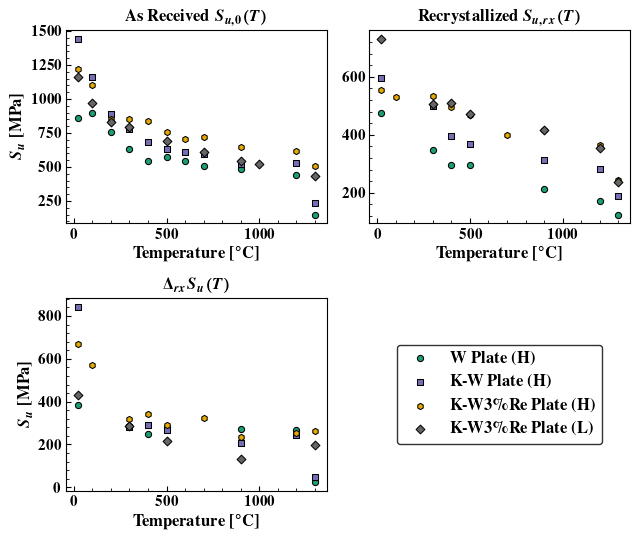

In [2]:
fig,axes = plt.subplots(nrows = 2,ncols = 2,figsize = (6.5,5.5))


for ax in axes.flat:
    setup_axis_default(ax)

data = NogamiUTSData()
materials = ['W Plate (H)','K-W Plate (H)','K-W3%Re Plate (H)','K-W3%Re Plate (L)']
markers = ['o','s','h','D']
for title,ax in zip([r'\textbf{As Received} $S_{u,0}(T)$',r'\textbf{Recrystallized} $S_{u,rx}(T)$',r'$\Delta_{rx} S_u(T)$'],axes.flat):
    ax.set_title(title)
    ax.set_xlabel(r'\textbf{Temperature [$^\circ$C]}',fontsize = 12)

colors = plt.get_cmap('Dark2')(np.linspace(0,1,len(materials)))

for material,marker,color in zip(materials,markers,colors):
    for ax,rx in zip(axes[0,:],['',' Rx']):
        x,y = data['UTS [MPa] ' + material + rx] 
        ax.scatter(x,y,label = r'\textbf{' + material.replace('%','\%') + rx + '}',s = 20,
                   edgecolor = 'k',facecolor = color,marker = marker,lw = 0.75)

for material,marker,color in zip(materials,markers,colors):
    df = data.get_df('UTS [MPa] ' + material,keep_column= False)
    rx_df = data.get_df('UTS [MPa] ' + material + ' Rx',keep_column= False)
    delta = (df - rx_df)
    delta.dropna(inplace = True)

    axes[1,0].scatter(delta.index,delta.to_numpy(),label = r'\textbf{' + material.replace('%','\%') + rx + '}',s = 20,
                edgecolor = 'k',facecolor = color,marker = marker,lw = 0.75)
        
axes[1,1].axis('off')
legend = axes[1,1].legend(handles = axes[0,0].get_legend_handles_labels()[0],loc = 'center',ncol = 1,fontsize = 12)
frame = legend.get_frame()
frame.set_linewidth(1.0)
frame.set_edgecolor('k')

for ax in axes[:,0]:
    ax.set_ylabel(r'\textbf{$S_u$ [MPa]}',fontsize = 12)
fig.tight_layout()
fig.savefig(paths.IMAGES.joinpath('UTS_rx_Comparison.svg'))

### Total Elongation
We are also interested in the effect that recrystillization has on _total elongation_ $\varepsilon_{tr}(T)$ (as opposed to _uniform elongation_ $\varepsilon_{u}(T)$. Evidenced by the plot below, recystillization tends to increase the $\varepsilon_{tr}(T)$ dramatically.

### $\Delta_{rx} \varepsilon(T)$

As for the UTS, let's examine the behavior of:

$$
\Delta_{rx} \varepsilon_{tr}(T) = \varepsilon_{tr,rx}(T) -  \varepsilon_{tr,0}(T) 
$$

The symbology follows the same patterns as before. The difference now represents an increment in $\varepsilon(T)$ rather than a decrement. As before, it appears beyond a certain temperature, the increase in $\varepsilon(T)$ is relatively consistent, a trend that persists across alloys.

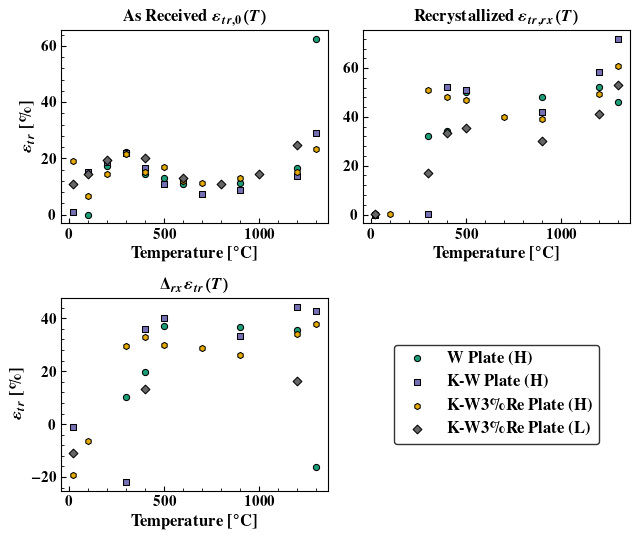

In [3]:
fig,axes = plt.subplots(nrows = 2,ncols = 2,figsize = (6.5,5.5))

for ax in axes.flat:
    setup_axis_default(ax)

data = NogamiUTSData()
materials = ['W Plate (H)','K-W Plate (H)','K-W3%Re Plate (H)','K-W3%Re Plate (L)']
markers = ['o','s','h','D']
for title,ax in zip([r'\textbf{As Received} $\varepsilon_{tr,0}(T)$',r'\textbf{Recrystallized} $\varepsilon_{tr,rx}(T)$',r'$\Delta_{rx} \varepsilon_{tr}(T)$'],axes.flat):
    ax.set_title(title)
    ax.set_xlabel(r'\textbf{Temperature [$^\circ$C]}',fontsize = 12)

colors = plt.get_cmap('Dark2')(np.linspace(0,1,len(materials)))

for material,marker,color in zip(materials,markers,colors):
    for ax,rx in zip(axes[0,:],['',' Rx']):
        x,y = data['TE [%] ' + material + rx] 
        ax.scatter(x,y,label = r'\textbf{' + material.replace('%','\%') + rx + '}',s = 20,
                   edgecolor = 'k',facecolor = color,marker = marker,lw = 0.75)

for material,marker,color in zip(materials,markers,colors):
    df = data.get_df('TE [%] ' + material,keep_column= False)
    rx_df = data.get_df('TE [%] ' + material + ' Rx',keep_column= False)
    delta = (rx_df - df)
    delta.dropna(inplace = True)

    axes[1,0].scatter(delta.index,delta.to_numpy(),label = r'\textbf{' + material.replace('%','\%') + rx + '}',s = 20,
                edgecolor = 'k',facecolor = color,marker = marker,lw = 0.75)
        
axes[1,1].axis('off')
legend = axes[1,1].legend(handles = axes[0,0].get_legend_handles_labels()[0],loc = 'center',ncol = 1,fontsize = 12)
frame = legend.get_frame()
frame.set_linewidth(1.0)
frame.set_edgecolor('k')

for ax in axes[:,0]:
    ax.set_ylabel(r'\textbf{$\varepsilon_{tr}$ [\%]}',fontsize = 12)
fig.tight_layout()
fig.savefig(paths.IMAGES.joinpath('TE_rx_Comparison.svg'))

### Relating $\varepsilon_u(T)$ and $\varepsilon_{tr}(T)$ 

I'm not really convinced by the empirical evidence here that theres a straightforward relationship between $\varepsilon_{tr}(T)$ and $\varepsilon_{u}(T)$.

### Examining Stress Strain Curves

To get an idea of what is happening physically. $\varepsilon_{u}$ is the strain at which $S_u(T)$ occurs, and $\varepsilon_{tr}$ is the strain at which failure occurs (furthest right on the plot). As borne out by the above scatters, that $\varepsilon_{tr}$ is greater when the material is recrystillized, provided the temperature is high enough to avoid brittle fracture (as seen in Tano _et al._). 

We can see visually at least that the same can be said of uniform elongation, and indeed it appears that the result is even more dramatic.


                      sheng   tano  wirtz    xie
e_tr - Low Temp        2.34   0.23   3.21   1.60
e_tr - High Temp       4.18   3.63   3.05   2.78
e_u - Low Temp        17.31   0.19   3.21  16.00
e_u - High Temp        9.45  25.96  11.84  13.00
e_u/e_tr - Low Temp    7.40   0.85   1.00  10.00
e_u/e_tr - High Temp   2.26   7.15   3.88   4.67


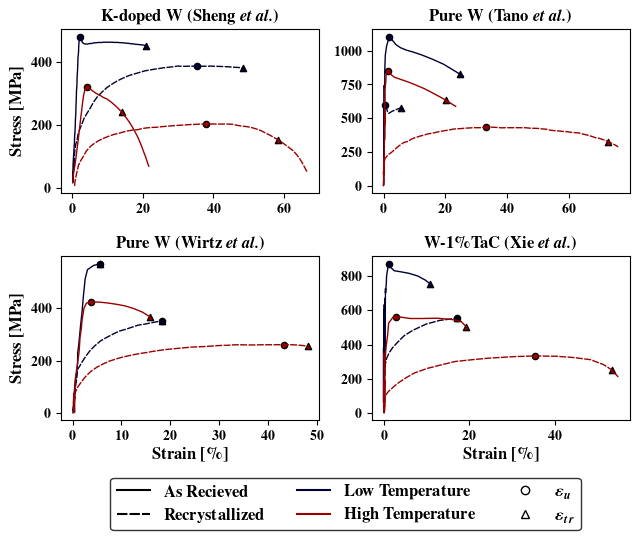

In [14]:
from matplotlib.lines import Line2D 
from matplotlib.patches import Circle,RegularPolygon
import pandas as pd
from scipy.interpolate import interp1d
from scipy.optimize import minimize_scalar,bisect

def bf_minimize_scalar(func: callable,bounds: Tuple[float,float],interval: int = 10,**kwargs) -> float:
    
    """
    Brute force minimize scalar function by dividing the interval into smaller intervals and using scipy's minimize_scalar
    """
    intervals = np.linspace(bounds[0],bounds[1],interval + 1)
    f = np.ones(interval)*np.inf
    x = np.zeros(interval)
    for i in range(interval):
        try:
            res = minimize_scalar(func,bounds = (intervals[i],intervals[i+1]),**kwargs)
            x[i]  = res.x
            f[i] = res.fun
        except ValueError:
            pass
    
    return x[np.argmin(f)]

def bf_bisect(func: callable,bounds: Tuple[float,float],interval: int = 50,**kwargs) -> float:
    """"
    Brute force bisection method by dividing the interval into smaller intervals and using scipy's bisect
    """
    intervals = np.linspace(bounds[0],bounds[1],interval + 1)
    f = np.ones(interval)*np.inf
    x = np.zeros(interval)
    for i in range(interval):
        try:
            xx = bisect(func,intervals[i],intervals[i+1],**kwargs)
            x[i]  = xx
            f[i] = func(xx)
        except ValueError:
            pass
    
    return x[np.argmin(f)]

def estimate_eu(df: pd.DataFrame,**interp_kwargs) -> Tuple[float,float]:
    """
    Estimate the uniform elongation and corresponding ultimate tensile stress of the material
    """
    func = interp1d(df.index,df.to_numpy().squeeze(),**interp_kwargs)
    def _opt_func(x):
        return -func(x)

    eps_u = bf_minimize_scalar(_opt_func,bounds = (df.index.min(),df.index.max()),method = 'bounded')
    Su = func(eps_u)
    return eps_u,Su

def estimate_tr(df: pd.DataFrame,dec_frac = 0.25,**interp_kwargs) -> Tuple[float,float]:
    """
    Estimate the total elongation and corresponding stress at failure of the material
    """
    func = interp1d(df.index,df.to_numpy().squeeze(),**interp_kwargs)
    def _opt_func(x):
        return -func(x)
    
    eu = bf_minimize_scalar(_opt_func,bounds = (df.index.min(),df.index.max()),method = 'bounded')
    Su = func(eu)
    
    if df.iloc[-1].squeeze() > Su*(1-dec_frac):
        eps_tr = df.index[-1]

    else:
        eps_tr = bf_bisect(lambda x: func(x) - Su*(1.-dec_frac),(eu,df.index[-1]))

    return eps_tr,func(eps_tr)

folders = {'sheng': [300,1000],
           'tano': [300,600],
           'wirtz': [300,500],
           'xie': [200,500]}

titles = {'sheng': r'K-doped W (Sheng \textit{et al.})',
         'tano': r'Pure W (Tano \textit{et al.})',
         'wirtz': r'Pure W (Wirtz \textit{et al.})',
         'xie': r'W-1\%TaC (Xie \textit{et al.})'}

data_path = paths.STRUCTURAL_DATA.joinpath('rx_stress_strain')
fig,axes = plt.subplot_mosaic('''AB
                              CD
                              EE''',figsize = (6.5,5.5),height_ratios = [1,1,0.25])
legend_axes = axes['E']
axes = np.array([[axes['A'],axes['B']],[axes['C'],axes['D']]])

colors = [(0,0,51/255),(153/255,0,0)]
table_data = dict.fromkeys(folders.keys())

for folder,ax in zip(folders,axes.ravel()):
    eps_u = np.empty([2,2])
    eps_tr = np.empty([2,2]) 
    for i,color,temperature in zip(range(2),colors,folders[folder]):
        for j,ls,state in zip(range(2),['-',(0, (5, 1))],['as_recieved','rx']):
            data = pd.read_csv(data_path.joinpath(folder,f'{state}_{temperature}C.csv'),index_col = 0,header= None)
            data.sort_index(inplace = True)
            eu,Su = estimate_eu(data)
            tr,Sf = estimate_tr(data)

            ax.scatter(eu,Su,marker = 'o',color = color,edgecolor ='k',s = 20)
            ax.scatter(tr,Sf,marker = '^',color = color,edgecolor ='k',s = 20)

            eps_u[i,j] = eu 
            eps_tr[i,j] = tr


            ax.plot(data.index,data, label = f'{state} {temperature}C',color = color,ls = ls,lw = 1.0)

    eps_u = pd.DataFrame(eps_u,index = folders[folder],columns = ['as_recieved','rx'])
    eps_tr = pd.DataFrame(eps_tr,index = folders[folder],columns = ['as_recieved','rx'])

    table_data[folder] = pd.Series(np.array([eps_tr['rx']/eps_tr['as_recieved'],eps_u['rx']/eps_u['as_recieved']]).flatten(order = 'C'),
                                   index = ['e_tr - Low Temp','e_tr - High Temp','e_u - Low Temp','e_u - High Temp'])

    ax.set_title(r'\textbf{' + titles[folder] + '}',fontsize =12)


table_data = pd.DataFrame(table_data)
table_data.loc['e_u/e_tr - Low Temp',:] = table_data.loc['e_u - Low Temp',:] / table_data.loc['e_tr - Low Temp',:]  
table_data.loc['e_u/e_tr - High Temp',:] = table_data.loc['e_u - High Temp',:] / table_data.loc['e_tr - High Temp',:]
print(np.round(table_data,2))
for i in range(2):
    axes[i,0].set_ylabel(r'\textbf{Stress [MPa]}',fontsize = 12)  
    axes[1,i].set_xlabel(r'\textbf{Strain [\%]}',fontsize = 12)

patches = [Line2D([],[],color = 'k',lw = 1.5,ls = '-',label = r'\textbf{As Recieved}'),
           Line2D([],[],color = 'k',lw = 1.5,ls = (0, (5, 1)),label = r'\textbf{Recrystallized}'),
           Line2D([],[],color = colors[0],lw = 1.5,ls = '-',label = r'\textbf{Low Temperature}'),
           Line2D([],[],color = colors[1],lw = 1.5,ls = '-',label = r'\textbf{High Temperature}'),
           Line2D([],[],markerfacecolor = 'w',markeredgecolor = 'k',marker = 'o',label = r'$\varepsilon_{u}$',ls = ''),
           Line2D([],[],markerfacecolor = 'w',markeredgecolor = 'k',marker = '^',label = r'$\varepsilon_{tr}$',ls = '')
]
legend = legend_axes.legend(handles = patches,loc = 'center',ncol = 3,fontsize = 12)
legend_axes.axis('off')
frame = legend.get_frame()
frame.set_linewidth(1.0)
frame.set_edgecolor('k')
fig.tight_layout()
fig.savefig(paths.GIT_IMAGES.joinpath('rx_stress_strain.svg'))

### K-Doped 3%Re Tungsten Alloy Tensile Tests

What do the (as recieved) stress-strain curves look like for a "high-performance" alloy?

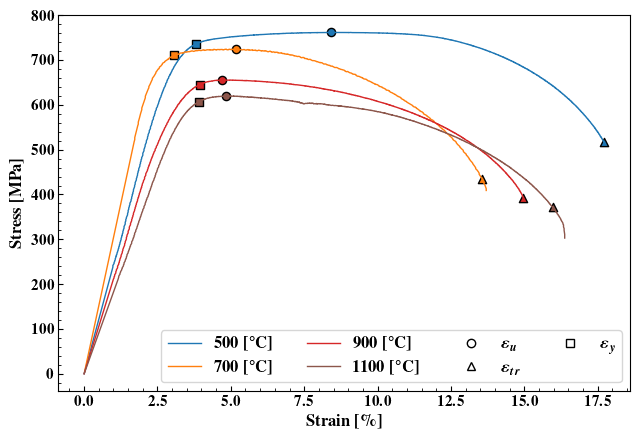

In [ ]:
import math

def moving_average(data: np.ndarray,window: int) -> np.ndarray:
    return np.convolve(data,np.ones(window)/window,mode = 'same')

def estimate_ym(data: pd.DataFrame,smooth: int = 6,E_frac = 0.5,
                    return_end_point: bool = False,
                         **interp_kwargs) -> Tuple[float,float]:

    """
    estimate the young's modulus of the material - this is not a very general function,
    would require adapation/modification for different data.
    """
    smooth = int(math.ceil(smooth/2)*2)
    signal = moving_average(data.to_numpy().squeeze(),smooth)[::smooth//2]
    xx = data.index.to_numpy()[1:][::smooth//2]
    signal = signal[1:] if signal.shape[0] > xx.shape[0] else signal
    deriv = np.gradient(signal,xx)
    
    func = interp1d(xx,deriv,**interp_kwargs)
    E = deriv[smooth:smooth*2].mean()

    def _opt_func(x):
        return func(x) - E_frac*E

    end_point = smooth*4
    while end_point < signal.shape[0] - 1 and deriv[end_point] > 0.0:
        end_point += 1
     
    
    end_point*= smooth//2
    yield_point = bf_bisect(_opt_func,bounds = (data.index[smooth*4],data.index[end_point]))
    
    _data = data.loc[data.index < yield_point*0.9]    
    _data = _data.iloc[smooth*2::]

    E = np.mean(_data.to_numpy()/_data.index.to_numpy())
    return E if not return_end_point else (E,end_point)

def estimate_yield_point(data: pd.DataFrame,smooth: int = 6,**interp_kwargs) -> Tuple[float,float]:
    """"
    Estimate the yield point of the material.
    """
    E,ei = estimate_ym(data,smooth = smooth,return_end_point = True,**interp_kwargs)
    sigma_02_offset = lambda eps: E*(eps -0.02)
    signal = moving_average(data.to_numpy().squeeze(),smooth)[::smooth//2]
    xx = data.index.to_numpy()[1:][::smooth//2]
    signal = signal[1:] if signal.shape[0] > xx.shape[0] else signal
    func = interp1d(xx,signal,**interp_kwargs)

    def _intersection_func(eps: float ) -> float:
        return func(eps) - sigma_02_offset(eps)
    
    eps_yield = bf_bisect(_intersection_func,bounds = (0.0,data.index[ei]))

    return eps_yield,func(eps_yield)


data_path = paths.STRUCTURAL_DATA.joinpath('rx_stress_strain','nogami')
fig,ax = plt.subplots(figsize = (6.5,4.5))
setup_axis_default(ax)
temperatures = [500,700,900,1100]

colors = plt.get_cmap('tab10')(np.linspace(0,0.5,len(temperatures)))
for i in range(len(temperatures)):
    file = data_path.joinpath('kdopedRe3percent_{}C.csv'.format(temperatures[i]))
    data = pd.read_csv(file,index_col = 0,header= 0)
    data.sort_index(inplace = True)
    eu,Su = estimate_eu(data)
    tr,Sf = estimate_tr(data,dec_frac = 0.4)

    e,S = estimate_yield_point(data,smooth = 5)
    ax.plot(data.index*100,data,color = colors[i],lw = 1.0,
            label = rf'${temperatures[i]}$'  +  r' \textbf{[$^\circ$C]}',ls = '-')
    ax.scatter(eu*100,Su,marker = 'o',facecolor = colors[i],edgecolor ='k',s = 35)
    ax.scatter(tr*100,Sf,marker = '^',facecolor = colors[i],edgecolor ='k',s = 35)
    ax.scatter(e*100,S,marker = 's',facecolor = colors[i],edgecolor ='k',s = 35)


handles = ax.get_legend_handles_labels()[0]

handles.extend([Line2D([],[],markerfacecolor = 'w',markeredgecolor = 'k',marker = 'o',label = r'$\varepsilon_{u}$',ls = ''),
                Line2D([],[],markerfacecolor = 'w',markeredgecolor = 'k',marker = '^',label = r'$\varepsilon_{tr}$',ls = ''),
                Line2D([],[],markerfacecolor = 'w',markeredgecolor = 'k',marker = 's',label = r'$\varepsilon_{y}$',ls = '')])


ax.legend(handles = handles,ncol = 4,fontsize = 12)
ax.set_xlabel(r'\textbf{Strain [\%]}',fontsize = 12)
ax.set_ylabel(r'\textbf{Stress [MPa]}',fontsize = 12)
ax.set_yticks(np.arange(0,900,100))
fig.tight_layout()
fig.savefig(paths.IMAGES.joinpath('nogami_rx_stress_strain.svg'))
